In [55]:
import numpy as np

def Fisher(x,y):
    # 计算+1类与-1类的数量
    N_p = np.count_nonzero(y == 1)
    N_n = np.count_nonzero(y == -1)
    
    # 计算各类别的均值
    mu_p= np.zeros((x.shape[1],))
    mu_n = np.zeros((x.shape[1],))
    for i in range(x.shape[0]):
        if y[i] == 1:
            mu_p += x[i]
        else:
            mu_n += x[i]
    mu_p = mu_p / N_p
    mu_n = mu_n / N_n

    # 计算各个类别的协方差矩阵
    sigma_p = np.zeros((x.shape[1],x.shape[1]))
    sigma_n = np.zeros((x.shape[1],x.shape[1]))
    for i in range(x.shape[0]):
        if y[i] == 1:
            t = (x[i]-mu_p).reshape(x.shape[1],1)
            t = t.dot(t.T)
            sigma_p += t
        else:
            t = (x[i]-mu_n).reshape(x.shape[1],1)
            t = t.dot(t.T)
            sigma_n += t
    sigma_p = sigma_p / N_p
    sigma_n = sigma_n / N_n
    
    # 计算S_w
    S_w = sigma_p + sigma_n
    S_w_inverse = np.linalg.inv(S_w)

    # 求解 W* 与 S'
    w_star = S_w_inverse.dot(mu_p - mu_n)
    s_prime = w_star.T.dot(mu_p + mu_n)
    return (w_star,s_prime)


def test(W_star,s_prime,x,y,test_flag):
    predict = np.sign(W_star.dot(x.T) - s_prime)
    miss_predict = np.absolute(predict - y)
    error_number = np.count_nonzero(miss_predict, axis=0)
    acc =  1 - error_number / len(x)
    log_str = "TRAIN_RESULT" if not test_flag else "TEST_RESULT"
    print("---------"+log_str+"--------")
    print("W = ",end = '')
    print(W_star)
    print("S' = ",end = '')
    print(s_prime)
    print("Accuracy = " + str(acc))

def gen_data(u10,sigma10,u11,sigma11,u20,sigma20,u21,sigma21,n : int = 200):
    # 协方差矩阵等于单位矩阵 <=> 独立
    x1_0 = np.random.normal(u10,sigma10,n).reshape(n,1)
    x1_1 = np.random.normal(u11,sigma11,n).reshape(n,1)
    x1 = np.concatenate((x1_0,x1_1),axis=1)
    y1 = np.ones((n,))
    x2_0 = np.random.normal(u20,sigma20,n).reshape(n,1)
    x2_1 = np.random.normal(u21,sigma21,n).reshape(n,1)
    x2 = np.concatenate((x2_0, x2_1), axis=1)
    y2 = - np.ones(n,)
    train_set_x = np.concatenate((x1[0:int(0.8 * n),],x2[0:int(0.8 * n),]))
    train_set_y = np.concatenate((y1[0:int(0.8 * n),],y2[0:int(0.8 * n),]))
    test_set_x = np.concatenate((x1[int(0.8 * n):,],x2[int(0.8 * n):,]))
    test_set_y = np.concatenate((y1[int(0.8 * n):, ], y2[int(0.8 * n):, ]))
    return (train_set_x,train_set_y,test_set_x,test_set_y)


In [56]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(-5,1,0,1,0,1,5,1)
w_star,s_prime = Fisher(train_set_x,train_set_y)
test(w_star,s_prime,train_set_x,train_set_y,0)
test(w_star,s_prime,test_set_x,test_set_y,1)


---------TRAIN_RESULT--------
W = [-2.10981484 -2.48779758]
S' = -2.259759969191559
Accuracy = 1.0
---------TEST_RESULT--------
W = [-2.10981484 -2.48779758]
S' = -2.259759969191559
Accuracy = 1.0


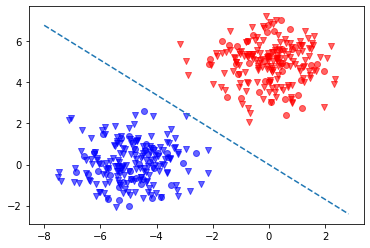

In [57]:
import matplotlib.pyplot as plt
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
plt.scatter(train_set_x[160:,0], train_set_x[160:,1],c='red',marker='v',alpha=0.6)
plt.scatter(train_set_x[0:160,0], train_set_x[0:160,1],c='blue',marker='v',alpha=0.6)
plt.scatter(test_set_x[40:,0], test_set_x[40:,1],c='red',alpha=0.6)
plt.scatter(test_set_x[0:40,0], test_set_x[0:40,1],c='blue',alpha=0.6)
abline(-w_star[0]/w_star[1],0)
plt.show()

我们可以看到，Fisher线性判别算法很好的找到了当前数据下两个类别的分界线，正确率为100%。我们接下来尝试更换数据集：


---------TRAIN_RESULT--------
W = [ 0.48686049 -0.50513976]
S' = 0.12347800513684733
Accuracy = 0.75
---------TEST_RESULT--------
W = [ 0.48686049 -0.50513976]
S' = 0.12347800513684733
Accuracy = 0.75


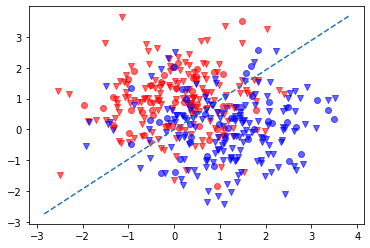

In [58]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(1,1,0,1,0,1,1,1,200)
w_star,s_prime = Fisher(train_set_x,train_set_y)
test(w_star,s_prime,train_set_x,train_set_y,0)
test(w_star,s_prime,test_set_x,test_set_y,1)
plt.scatter(train_set_x[160:,0], train_set_x[160:,1],c='red',marker='v',alpha=0.6)
plt.scatter(train_set_x[0:160,0], train_set_x[0:160,1],c='blue',marker='v',alpha=0.6)
plt.scatter(test_set_x[40:,0], test_set_x[40:,1],c='red',alpha=0.6)
plt.scatter(test_set_x[0:40,0], test_set_x[0:40,1],c='blue',alpha=0.6)
abline(-w_star[0]/w_star[1],0)
plt.show()

在如上数据集上，Fisher线性判别算法的工作正常，能够找到最佳投影方向与判别阈值。